### ARCH (Autoregressive Conditional Heteroskedasticity)

$y_{t}=\frac{x_{t} - x_{t-1}}{x_{t-1}}$ (returns)

$\sigma_{t}^2 = \frac{1}{t}\sum_{i=1}^{t}(y_{t}-\bar{y})^2=\frac{1}{t}\sum_{i=1}^{t}y_{t}^2=\frac{1}{1}\sum_{i=1}^{1}y_{t}^2=y_{t}^2$ (variance or volatility of $y_{t}$; mean returns is zero and only one observation is possible)

ARCH(p) describes an ARCH model with p lags. The simplest model would be ARCH(1) as follows.

(1) $\sigma_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2$ (volatility of $y_{t}$ is conditional on $y_{t-1}$; may add more terms for more lags)

(2) $y_{t}=\sigma_{t}\epsilon_{t}=\epsilon_{t}\sqrt{\alpha_{0}+\alpha_{1}y_{t-1}^2}$

(3) $y_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\epsilon_{t}$

$\epsilon_{t} \sim N(\mu=0,\sigma^2=1)$ (error)

### GARCH (Generalized ARCH)

GARCH improves ARCH by including volatility from the previous time step in the current volatility term such that the causal relationship between periods of high or low volatility are considered.

GARCH(p, q) describes an GARCH model with p-order of $y_{t}$ and q-order of $\sigma^2$. The simplest model would be GARCH(1,1) as follows.

(1) $\sigma_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2$

(2) $y_{t}=\sigma_{t}\epsilon_{t}=\epsilon_{t}\sqrt{\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2}$

(3) $y_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2+\epsilon_{t}$

$\epsilon_{t} \sim N(\mu=0,\sigma^2=1)$ (error) 

Coefficients are estimated through maximum likelihood estimation with numerial optimization.

#### Conditions
(1) Time series must be stationary at a mean of zero.

(2) Time series must exhibit periods of similar volatility.

(3) Use the PACF (Partial Autocorrelation Function) to find the appropriate number of lags. PACF yields the correlation between lagged values within a stationary time series.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model
from download import download

apikey = open("apikey", "r").readline()

In [2]:
ticker = "SPY"
dat = download(ticker, apikey)
print(dat)

            date  adjClose
0     2000-01-03     94.26
1     2000-01-04     90.58
2     2000-01-05     90.74
3     2000-01-06     89.28
4     2000-01-07     94.47
...          ...       ...
5972  2023-09-28    428.52
5973  2023-09-29    427.48
5974  2023-10-02    427.31
5975  2023-10-03    421.59
5976  2023-10-04    424.66

[5977 rows x 2 columns]


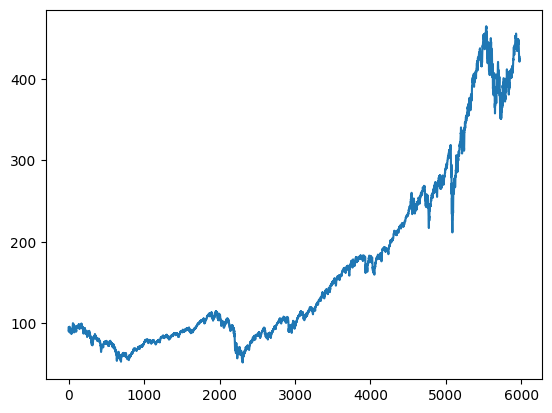

In [3]:
plt.plot(dat["adjClose"])
plt.show()

In [4]:
t0 = np.array(dat["adjClose"].iloc[0:-1])
t1 = np.array(dat["adjClose"].iloc[1:])

returns = (t1 - t0) * 100 / t0
print(pd.DataFrame(returns).describe())

                 0
count  5976.000000
mean      0.032883
std       1.239954
min     -10.940454
25%      -0.480699
50%       0.063621
75%       0.601747
max      14.525140


[Text(0.5, 0, 'SPY P&L'), Text(0, 0.5, 'Frequency')]

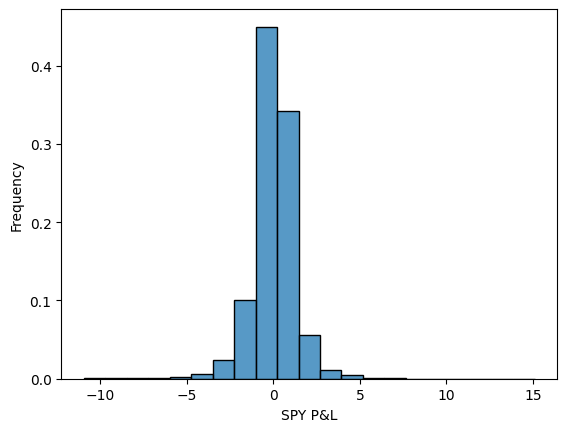

In [5]:
ax = sns.histplot(data=returns, binwidth=np.std(returns), stat="probability")
ax.set(xlabel="{} P&L" .format(ticker), ylabel="Frequency")

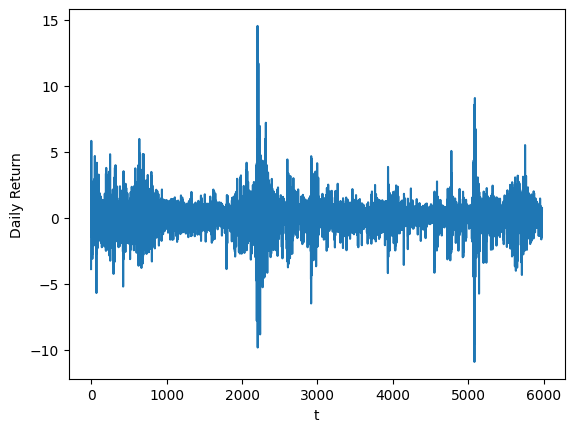

In [6]:
plt.plot(returns)
plt.xlabel("t")
plt.ylabel("Daily Return")
plt.show()

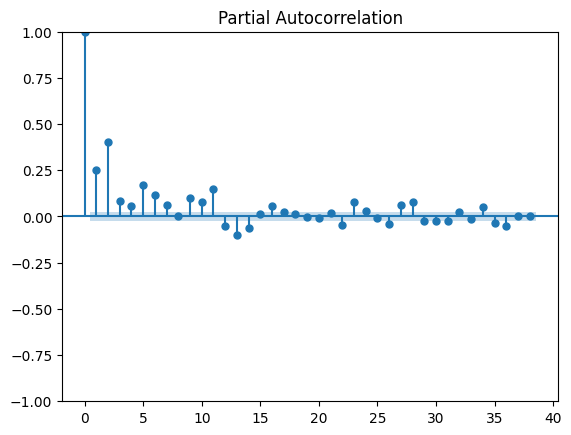

In [7]:
plot_pacf(returns**2)
plt.show()

In [8]:
lags = 2
model = arch_model(returns, p=lags,q=lags)

In [9]:
model.fit().summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 109750.01969439798
Iteration:      2,   Func. Count:     20,   Neg. LLF: 34716.99860295291
Iteration:      3,   Func. Count:     31,   Neg. LLF: 12626.518566221941
Iteration:      4,   Func. Count:     40,   Neg. LLF: 15228.320206907447
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2435538388.6217403
Iteration:      6,   Func. Count:     57,   Neg. LLF: 8456.588409448901
Iteration:      7,   Func. Count:     65,   Neg. LLF: 8289.092558267386
Iteration:      8,   Func. Count:     73,   Neg. LLF: 8268.307263882474
Iteration:      9,   Func. Count:     81,   Neg. LLF: 8263.751666893582
Iteration:     10,   Func. Count:     89,   Neg. LLF: 8263.156061942831
Iteration:     11,   Func. Count:     97,   Neg. LLF: 8262.935232364778
Iteration:     12,   Func. Count:    104,   Neg. LLF: 8262.935135272464
Iteration:     13,   Func. Count:    111,   Neg. LLF: 8262.935129339547
Iteration:     14,   Func. Count:    117,   Neg. LLF: 8262.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8262.94
Distribution:                  Normal   AIC:                           16537.9
Method:            Maximum Likelihood   BIC:                           16578.0
                                        No. Observations:                 5976
Date:                Wed, Oct 04 2023   Df Residuals:                     5975
Time:                        22:07:51   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0722  1.046e-02      6.901  5.181e-12 [5.168e-02,9.268e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0429  9.307e-03      4.614  3.942e-06 [2.471e-02,6.119e-02]
alpha[1]       0.0861  2.081e-02      4.137  3.517e-05   [4.531e-02,  0.127]
alpha[2]       0.1336  2.245e-02      5.950  2.675e-09   [8.957e-02,  0.178]
beta[1]        0.2048      0.218      0.938      0.348     [ -0.223,  0.633]
beta[2]        0.5450      0.195      2.800  5.106e-03     [  0.164,  0.927]
============================================================================

Covariance estimator: robust
"""

In [10]:
pred = []
start = returns.shape[0] - 1000
for i in range(start, returns.shape[0]):
    test = returns[:i]
    model = arch_model(test, p=lags, q=lags)
    yhat = np.sqrt(model.fit(disp="off").forecast(horizon=1).variance.values[-1,:][0])
    pred.append(yhat)

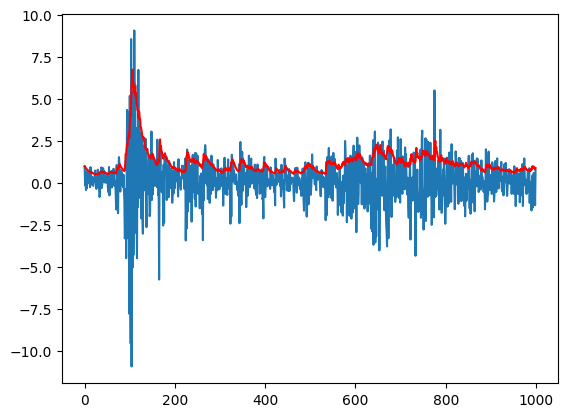

In [11]:
plt.plot(returns[start:])
plt.plot(pred, color="red")
plt.show()

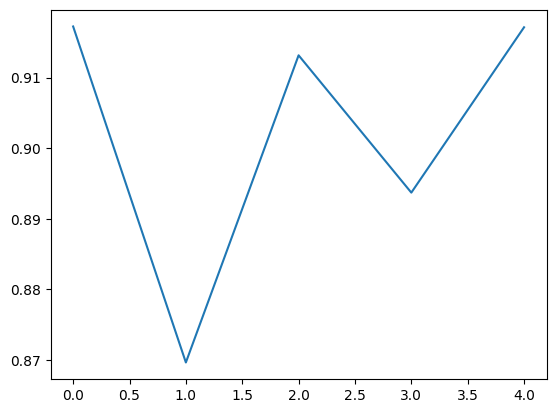

In [12]:
model = arch_model(returns, p=lags, q=lags)
yhat = np.sqrt(model.fit(disp="off").forecast(horizon=5).variance.values[-1,:])
plt.plot(yhat)
plt.show()